# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#3B3B3B;">Recognizing Handwritten Digits with ConvNet Architecture</p>**

In [25]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import struct
# Set seed for reproducibility
np.random.seed(0)

# 1. Data Preparation

In [2]:
# Functions to load local IDX data files
def load_images(filename):
    with open(filename, 'rb') as f:
        # Read the magic number, number of images, rows, and columns
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        # Load the image data
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows, cols)
    return images

def load_labels(filename):
    with open(filename, 'rb') as f:
        # Read the magic number and number of labels
        magic, num_labels = struct.unpack(">II", f.read(8))
        # Load the label data
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

In [3]:
# Load data from local paths
train_images_path = "train-images.idx3-ubyte"
train_labels_path = "train-labels.idx1-ubyte"
test_images_path = "t10k-images.idx3-ubyte"
test_labels_path = "t10k-labels.idx1-ubyte"

X_train = load_images(train_images_path)
y_train = load_labels(train_labels_path)
X_test = load_images(test_images_path)
y_test = load_labels(test_labels_path)

In [4]:
# Verify data shape
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


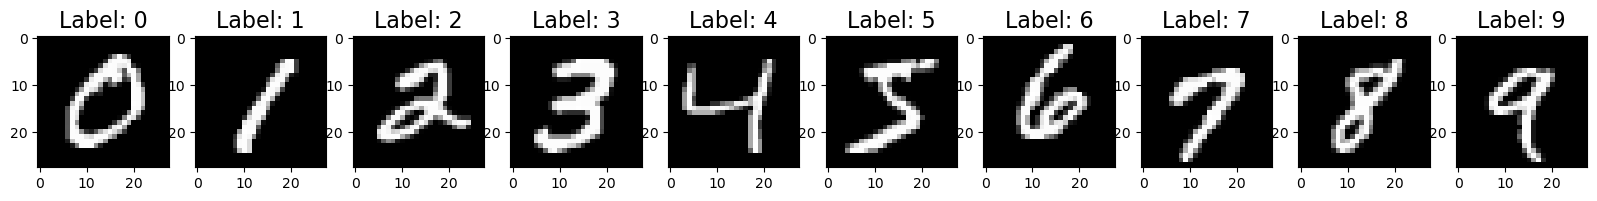

In [5]:
# Visualize Examples
number_classes = 10
f, ax = plt.subplots(1, number_classes, figsize=(20,20))

for i in range(0, number_classes):
    sample = X_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

# 2. Data Preprocessing

In [6]:
# One-Hot Encoding Labels
y_train = keras.utils.to_categorical(y_train, number_classes)
y_test = keras.utils.to_categorical(y_test, number_classes)

In [7]:
# Normalize Data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
# Reshape Data for Neural Network
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)

(60000, 784)


In [9]:
# Reshape data for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# 3. Model Architecture

In [10]:
cnn = Sequential()
cnn.add(Input(shape=(28, 28, 1)))  # Specify the input shape here
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [12]:
# Compile Model
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# 4. Model Training

In [14]:
# Train Model
batch_size = 512
epochs = 20
cnn.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 111ms/step - accuracy: 0.6853 - loss: 1.0187
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - accuracy: 0.9528 - loss: 0.1584
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - accuracy: 0.9686 - loss: 0.1081
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.9768 - loss: 0.0806
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.9789 - loss: 0.0713
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - accuracy: 0.9827 - loss: 0.0584
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - accuracy: 0.9834 - loss: 0.0560
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.9844 - loss: 0.0511
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.9866 - loss: 0.0439
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.9883 - loss: 0.0406
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.9880 - loss: 0.0377
Epoch 12/20
118/118

# 5. Model Evaluation

In [15]:
# Evaluate Model
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9910 - loss: 0.0258
Test Loss: 0.022171547636389732, Test Accuracy: 0.9929999709129333


In [16]:
# Make Predictions
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


# 6. Visualization of Predictions

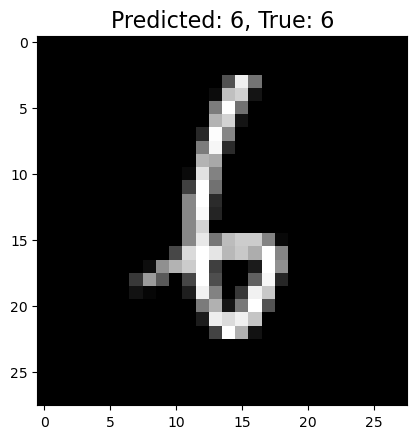

In [17]:
# Single Example Prediction Visualization
random_number = np.random.choice(len(X_test))
X_sample = X_test[random_number]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_number]
y_sample_pred_class = y_pred_classes[random_number]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(X_sample.reshape(28, 28), cmap='gray')
plt.show()

# 7. Confusion Matrix and Accuracy

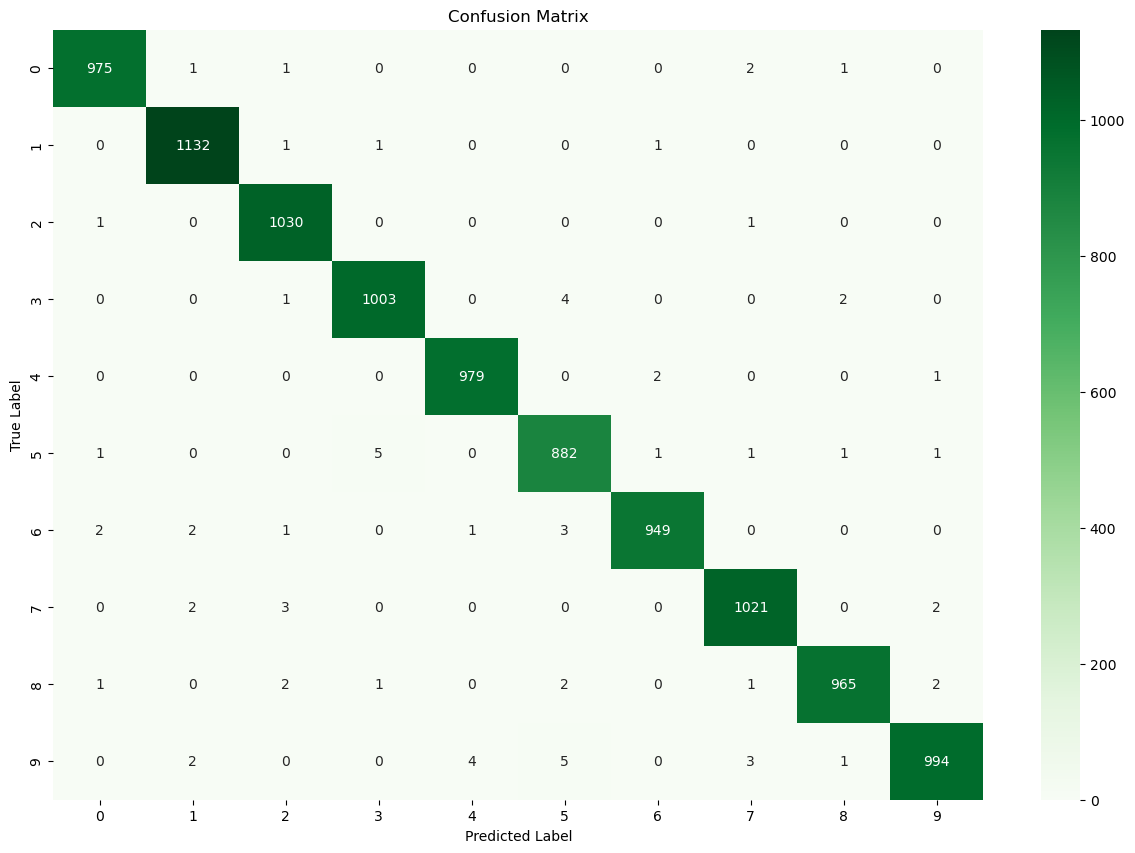

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="Greens")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')
plt.show()

In [32]:
# Calculate the overall accuracy using y_true and y_pred_classes
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes,average='macro')
recall = recall_score(y_true,y_pred_classes,average='macro')
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall Score: {recall * 100:.2f}%')

Accuracy: 99.30%
Precision: 99.29%
Recall Score: 99.29%


# 8. Error Analysis

In [22]:
# Investigate Some Errors
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_test_errors = X_test[errors]

y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

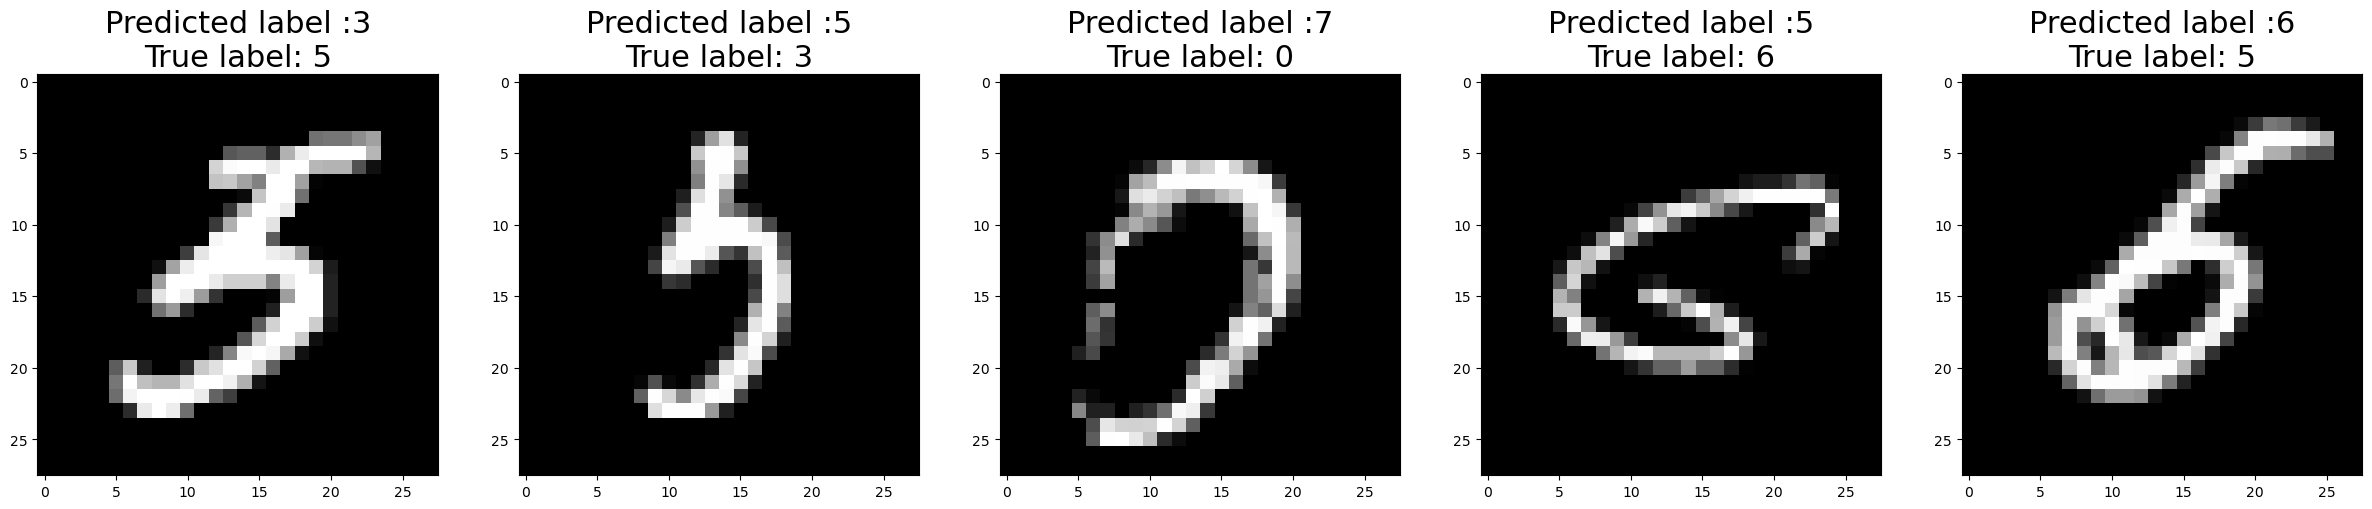

In [34]:
# Show Top Errors
number = len(top_idx_diff_errors)
f, ax = plt.subplots(1, number, figsize=(30,30))

for i in range(0, number):
    idx = top_idx_diff_errors[i]
    sample = X_test_errors[idx].reshape(28,28)
    y_t = y_true_errors[idx]
    y_p = y_pred_classes_errors[idx]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)